<a href="https://colab.research.google.com/github/PioDru/colab/blob/main/breast_usg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#!/bin/bash
!curl -L -o ./breast-usg.zip https://www.kaggle.com/api/v1/datasets/download/aryashah2k/breast-ultrasound-images-dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  194M  100  194M    0     0  18.7M      0  0:00:10  0:00:10 --:--:-- 22.9M


In [16]:
!unzip -q ./breast-usg.zip  -d breast-usg

replace breast-usg/Dataset_BUSI_with_GT/benign/benign (1).png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


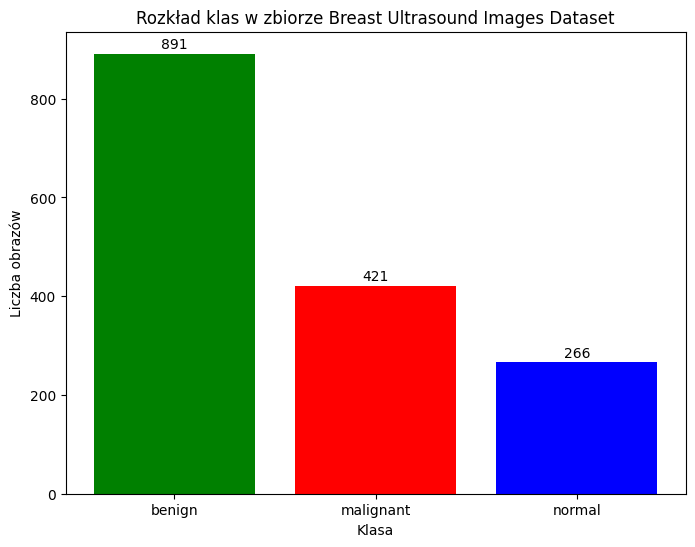

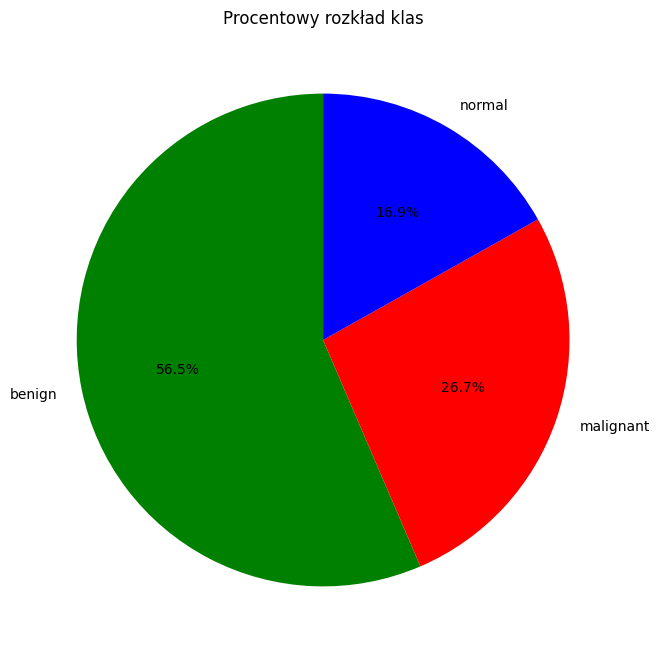

In [32]:
import matplotlib.pyplot as plt
import os

base_dir = '/content/breast-usg/Dataset_BUSI_with_GT'

# Dane: liczba obrazów dla każdej klasy
classes = ['benign', 'malignant', 'normal']
counts = [0, 0, 0]

for i, cls in enumerate(classes): # Use enumerate to get the index
    folder = os.path.join(base_dir, cls)
    if os.path.exists(folder):
        # Liczymy tylko pliki z rozszerzeniami obrazów
        num_files = len([f for f in os.listdir(folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
        counts[i] = num_files # Update counts using the index
    else:
        counts[i] = 0 # Update counts using the index

# Wykres słupkowy
plt.figure(figsize=(8,6))
bars = plt.bar(classes, counts, color=['green', 'red', 'blue'])  # Store the bar objects
plt.xlabel('Klasa')
plt.ylabel('Liczba obrazów')
plt.title('Rozkład klas w zbiorze Breast Ultrasound Images Dataset')

# Add labels above bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, count + 5,  # Adjust position as needed
             str(count), ha='center', va='bottom')

plt.show()

# Wykres kołowy
plt.figure(figsize=(8,8))
plt.pie(counts, labels=classes, autopct='%1.1f%%', startangle=90, colors=['green', 'red', 'blue'])
plt.title('Procentowy rozkład klas')
plt.show()

Rozkład klas w całym zbiorze:
class
benign       437
malignant    210
normal       133
Name: count, dtype: int64

Liczba próbek w podziale:
Treningowy: 546
Walidacyjny: 117
Testowy: 117

Rozkład klas w zbiorze treningowym:
class
benign       56.043956
malignant    26.923077
normal       17.032967
Name: proportion, dtype: float64

Rozkład klas w zbiorze walidacyjnym:
class
benign       55.555556
malignant    27.350427
normal       17.094017
Name: proportion, dtype: float64

Rozkład klas w zbiorze testowym:
class
benign       56.410256
malignant    26.495726
normal       17.094017
Name: proportion, dtype: float64

Liczba próbek w nowych zbiorach:
Trening: 546
Walidacja: 117
Test: 117


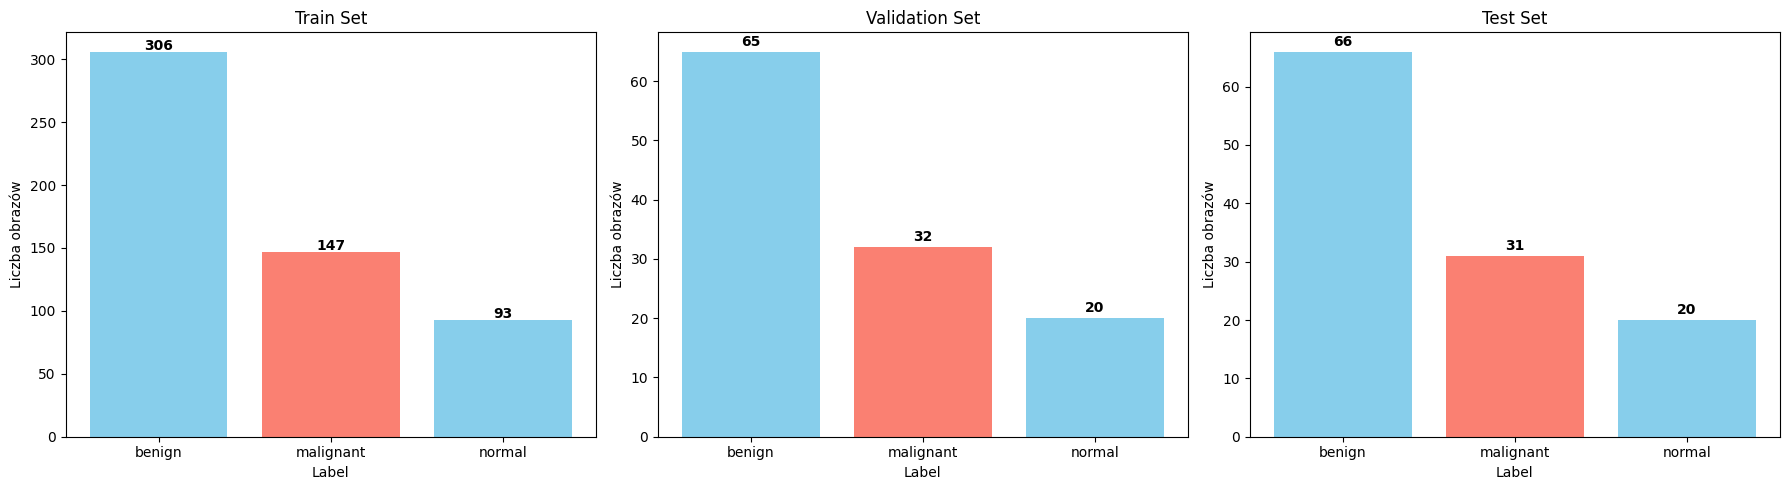

In [33]:
#balansowanie danych
import os
import glob
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Ścieżka do głównego katalogu zbioru danych
dataset_path = "/content/breast-usg/Dataset_BUSI_with_GT"

# Lista klas – zakładamy, że każdy folder odpowiada jednej klasie
classes = ['benign', 'malignant', 'normal']

# Zbiór danych – lista par (ścieżka do pliku, klasa)
data = []
for cls in classes:
    # Pobierz wszystkie pliki .png w katalogu danej klasy, np. *_mask.png pomijamy, jeśli chcemy pracować tylko z oryginalnymi obrazami
    # Jeśli obrazy oryginalne mają inny wzorzec, można go zmodyfikować
    files = glob.glob(os.path.join(dataset_path, cls, "*.png"))
    for file in files:
        # Możesz dodatkowo filtrować pliki, np. pomijając te zawierające "mask" w nazwie, jeśli potrzebujesz tylko obrazów wejściowych:
        if "mask" not in file:
            data.append((file, cls))

# Utwórz DataFrame, który będzie zawierał ścieżkę do obrazu oraz etykietę klasy
df = pd.DataFrame(data, columns=["filepath", "class"])

# Sprawdź rozkład klas w całości zbioru
print("Rozkład klas w całym zbiorze:")
print(df['class'].value_counts())

# Podział na zbiór treningowy (70%) oraz tymczasowy (30%) – używamy parametru stratify, by zachować rozkład klas
train_df, temp_df = train_test_split(
    df, test_size=0.30, random_state=42, stratify=df['class']
)

# Podział zbioru tymczasowego na walidacyjny (15%) i testowy (15%)
# Ponieważ temp_df stanowi 30% całego zbioru, podział 50/50 daje 15% na walidację i 15% na test
val_df, test_df = train_test_split(
    temp_df, test_size=0.5, random_state=42, stratify=temp_df['class']
)

# Wyświetlenie rozmiarów podziału
print("\nLiczba próbek w podziale:")
print(f"Treningowy: {train_df.shape[0]}")
print(f"Walidacyjny: {val_df.shape[0]}")
print(f"Testowy: {test_df.shape[0]}")

# Opcjonalnie: Wyświetlenie procentowego rozkładu klas w każdym zbiorze
print("\nRozkład klas w zbiorze treningowym:")
print(train_df['class'].value_counts(normalize=True) * 100)

print("\nRozkład klas w zbiorze walidacyjnym:")
print(val_df['class'].value_counts(normalize=True) * 100)

print("\nRozkład klas w zbiorze testowym:")
print(test_df['class'].value_counts(normalize=True) * 100)

print("\nLiczba próbek w nowych zbiorach:")
print("Trening:", len(train_df))
print("Walidacja:", len(val_df))
print("Test:", len(test_df))

# Opcjonalnie: zapisanie podziału do plików CSV
train_df.to_csv("train_split.csv", index=False)
val_df.to_csv("val_split.csv", index=False)
test_df.to_csv("test_split.csv", index=False)


# Generowanie wykresów obrazujących rozkład klas w poszczególnych zbiorach
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
datasets = [('Train', train_df), ('Validation', val_df), ('Test', test_df)]

for ax, (title, dataset) in zip(axs, datasets):
    # Change 'label' to 'class' to access the correct column
    counts = dataset['class'].value_counts()
    ax.bar(counts.index, counts.values, color=['skyblue', 'salmon'])
    ax.set_title(f'{title} Set')
    ax.set_xlabel('Label')
    ax.set_ylabel('Liczba obrazów')
    # Dodanie liczby nad słupkami
    for i, v in enumerate(counts.values):
        ax.text(i, v + 1, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

Rozkład klas w całości zbioru:
class
benign       437
malignant    210
normal       133
Name: count, dtype: int64

Liczba próbek - trening: 546, walidacja: 117, test: 117


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 248, 248, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 124, 124, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 122, 122, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 59, 59, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 29, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 27, 27, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 13, 13, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1024)                │      22,152,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,656,195 (86.43 MB)

 Trainable params: 22,656,195 (86.43 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 461ms/step - accuracy: 0.4306 - loss: 1.2497 - val_accuracy: 0.5556 - val_loss: 1.3158
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.5470 - loss: 1.0971 - val_accuracy: 0.5556 - val_loss: 1.0339
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.5352 - loss: 1.0576 - val_accuracy: 0.5641 - val_loss: 0.9030
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.5970 - loss: 0.9152 - val_accuracy: 0.5897 - val_loss: 0.8909
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.6457 - loss: 0.8177 - val_accuracy: 0.6752 - val_loss: 0.7933
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step - accuracy: 0.6932 - loss: 0.7294 - val_accuracy: 0.6667 - val_loss: 0.8491
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.7012 - loss: 0.5959 - val_accuracy: 0.6325 - val_loss: 1.0048
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.7782 - loss: 0.5264 - val_accuracy: 0

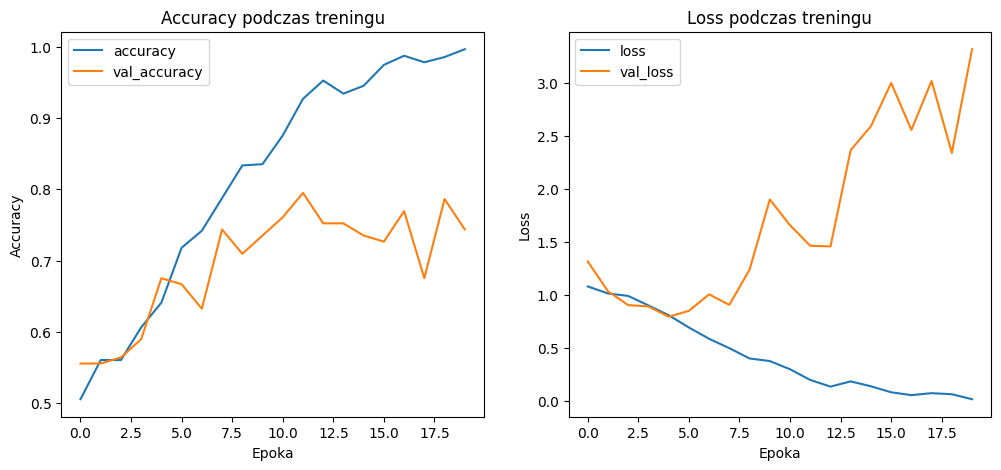

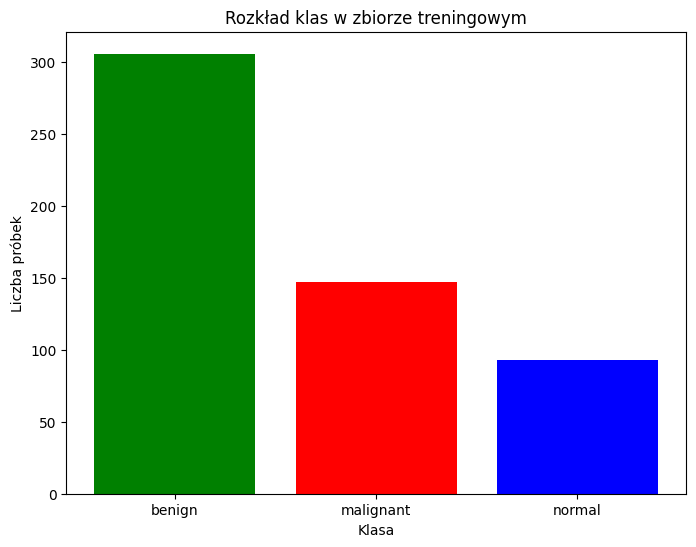

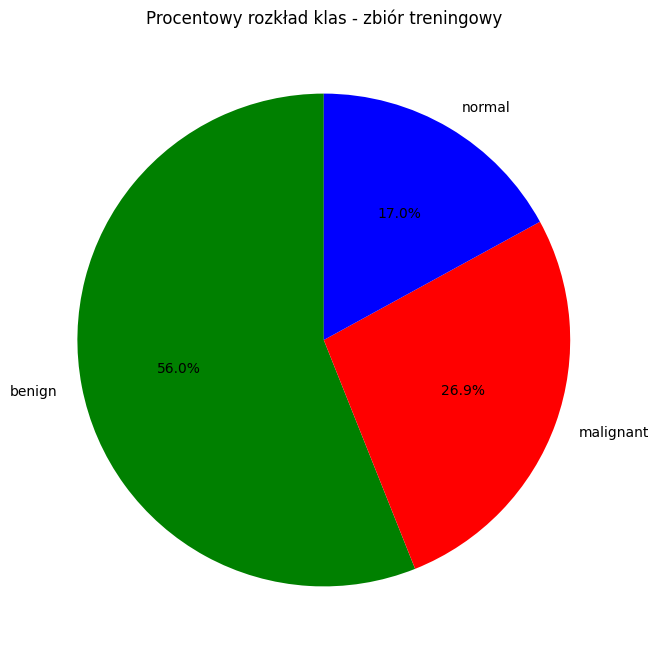

In [34]:
import os
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Przykładowy DataFrame – w praktyce wczytaj swoje dane, np. z CSV
# Zakładamy, że mamy kolumny: "filepath" (ścieżka do obrazu) i "class" (np. 'benign', 'malignant', 'normal')

'''
data = {
    'filepath': [
        '/path/to/benign/img1.png', '/path/to/benign/img2.png', '/path/to/benign/img3.png',
        '/path/to/malignant/img1.png', '/path/to/malignant/img2.png', '/path/to/malignant/img3.png',
        '/path/to/normal/img1.png', '/path/to/normal/img2.png', '/path/to/normal/img3.png'
    ],
    'class': [
        'benign', 'benign', 'benign',
        'malignant', 'malignant', 'malignant',
        'normal', 'normal', 'normal'
    ]
}
'''

df = pd.DataFrame(data, columns=["filepath", "class"]) # Explicitly name the columns

print("Rozkład klas w całości zbioru:")
print(df['class'].value_counts())

# Zakodowanie etykiet (np. jako liczby)
label_map = {'benign': 0, 'malignant': 1, 'normal': 2}
df['label'] = df['class'].map(label_map)

# Podział zbioru na treningowy (70%), walidacyjny (15%) i testowy (15%) z zachowaniem rozkładu klas
train_df, temp_df = train_test_split(df, test_size=0.30, random_state=42, stratify=df['label'])
val_df, test_df = train_test_split(temp_df, test_size=0.50, random_state=42, stratify=temp_df['label'])

print(f"\nLiczba próbek - trening: {train_df.shape[0]}, walidacja: {val_df.shape[0]}, test: {test_df.shape[0]}")

# Funkcja wczytująca i przetwarzająca obraz
IMG_SIZE = (250, 250)

def preprocess_image(filepath, label):
    # Wczytanie pliku obrazu
    image = tf.io.read_file(filepath)
    # Dekodowanie obrazu (zakładamy PNG)
    image = tf.image.decode_png(image, channels=3)
    # Zmiana rozmiaru obrazu
    image = tf.image.resize(image, IMG_SIZE)
    # Normalizacja do [0,1]
    image = image / 255.0
    return image, label

# Funkcja tworząca tf.data.Dataset z listy ścieżek i etykiet
def df_to_dataset(df, shuffle=True, batch_size=32):
    paths = df['filepath'].values
    labels = df['label'].values
    ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    ds = ds.map(lambda x, y: preprocess_image(x, y),
                num_parallel_calls=tf.data.AUTOTUNE)
    if shuffle:
        ds = ds.shuffle(buffer_size=len(df))
    ds = ds.batch(batch_size)
    ds = ds.prefetch(tf.data.AUTOTUNE)
    return ds

batch_size = 32

train_ds = df_to_dataset(train_df, shuffle=True, batch_size=batch_size)
val_ds   = df_to_dataset(val_df, shuffle=False, batch_size=batch_size)
test_ds  = df_to_dataset(test_df, shuffle=False, batch_size=batch_size)

# Definicja modelu CNN przy użyciu tf.keras (przykładowa, można modyfikować)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 klasy
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Trenowanie modelu
history = model.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds
)

# Ocena modelu na zbiorze testowym
test_loss, test_acc = model.evaluate(test_ds)
print(f"\nTest accuracy: {test_acc:.2f}")

model.save('breast_usg_model.keras')

# Wizualizacja historii trenowania
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoka')
plt.ylabel('Accuracy')
plt.title('Accuracy podczas treningu')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoka')
plt.ylabel('Loss')
plt.title('Loss podczas treningu')
plt.legend()
plt.show()

# Wizualizacja rozkładu klas w zbiorze treningowym
train_counts = train_df['class'].value_counts()
plt.figure(figsize=(8,6))
plt.bar(train_counts.index, train_counts.values, color=['green', 'red', 'blue'])
plt.xlabel('Klasa')
plt.ylabel('Liczba próbek')
plt.title('Rozkład klas w zbiorze treningowym')
plt.show()

plt.figure(figsize=(8,8))
plt.pie(train_counts.values, labels=train_counts.index, autopct='%1.1f%%', startangle=90,
        colors=['green', 'red', 'blue'])
plt.title('Procentowy rozkład klas - zbiór treningowy')
plt.show()


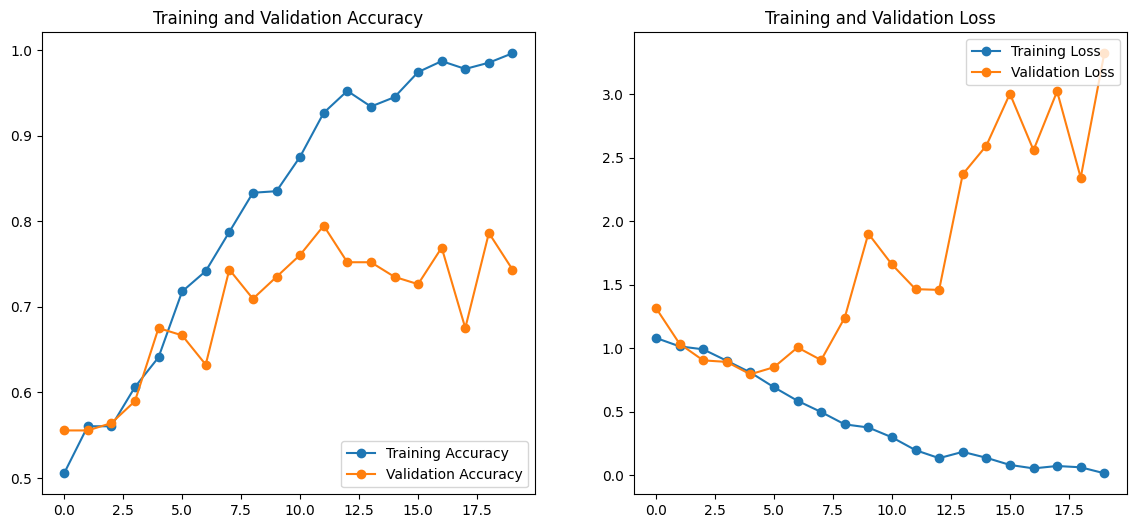

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.7354 - loss: 5.5057
Test Accuracy: 72.65%
Test Loss: 5.5957
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 208ms/step - accuracy: 0.7354 - loss: 5.5057
Test Accuracy: 72.65%
Test Loss: 5.5957
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 986ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
Confusion Matrix:
[[52 10  4]
 [ 6 22  3]
 [ 4  5 11]]


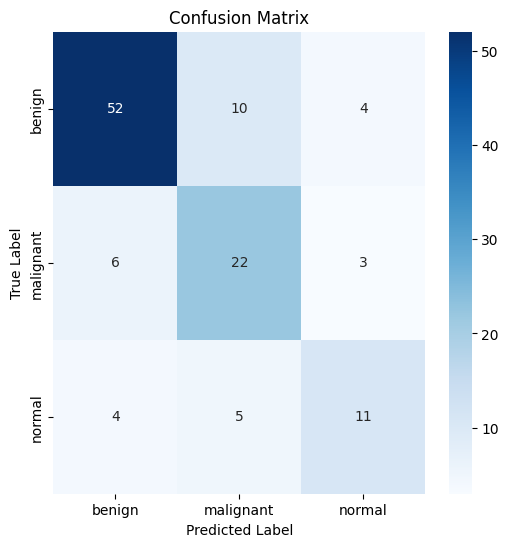

accuracy: 0.7265
recall: 0.7265
precision: 0.7351
f1: 0.7287
roc_auc: 0.7787


In [35]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# Zakładamy, że obiekt `history` został zwrócony przez model.fit
# history = model.fit(...)

# Wykres accuracy i loss dla danych treningowych oraz walidacyjnych
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(14, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

# Ocena modelu na zbiorze testowym
test_loss, test_accuracy = model.evaluate(test_ds)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Test Loss: {:.4f}".format(test_loss))

# Obliczenie macierzy pomyłek
# Upewnij się, że test_generator nie miesza kolejności, resetujemy go
#test_ds.reset()
predictions = model.predict(test_ds)
# Zakładamy, że mamy klasyfikację binarną z funkcją aktywacji sigmoid
test_loss, test_accuracy = model.evaluate(test_ds)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Test Loss: {:.4f}".format(test_loss))

# Obliczenie macierzy pomyłek
# Pobranie wszystkich etykiet i predykcji ze zbioru testowego
y_true = []
y_pred = []
for images, labels in test_ds:
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))  # Pobranie indeksu klasy o największym prawdopodobieństwie
    y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Wizualizacja macierzy pomyłek
plt.figure(figsize=(6, 6))
class_names = list(label_map.keys())  # Assuming label_map was defined earlier
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print('accuracy: {:.4f}'.format(accuracy_score(y_true, y_pred)))
print('recall: {:.4f}'.format(recall_score(y_true, y_pred, average='weighted'))) # Changed to 'weighted'
print('precision: {:.4f}'.format(precision_score(y_true, y_pred, average='weighted'))) # Changed to 'weighted'
print('f1: {:.4f}'.format(f1_score(y_true, y_pred, average='weighted'))) # Changed to 'weighted'

# ROC AUC score requires one-hot encoding for multi-class
from sklearn.preprocessing import label_binarize
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])
print('roc_auc: {:.4f}'.format(roc_auc_score(y_true_bin, y_pred_bin, average='weighted', multi_class='ovr'))) # Changed to 'weighted' and added multi_class parameter
